Text(0, 0.5, 'Y')

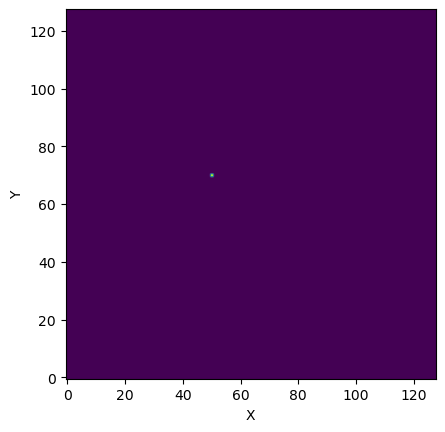

In [1]:
import numpy as np
from matplotlib import pyplot as pl

# First you load the generation (M) and recovery matrices (G)
M = np.load('data/sampling-12tx-4096samples-128x128.npy')
G = np.load('data/recovery-12tx-4096samples-128x128.npy')

# convert M and G to float64
M = M.astype(np.float64)
G = G.astype(np.float64)

# Then you create a scene
S = np.zeros((128,128))

# Then you add targets to the scene
S[50,70] = 1
#S[70,50] = 1

# The conversion from S to image is a two step process.
# First you produce the radar signal then you use the signal to get the image
signal = M.dot(S.T.flatten())
image  = signal.dot(G).reshape(128,128)

# The scene is your ground truth
pl.imshow(S.T,origin='lower')

# Cosmetics
ax = pl.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

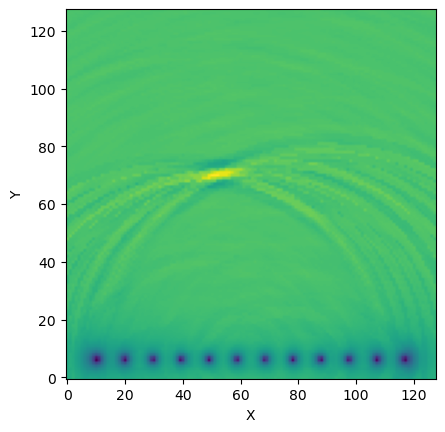

In [2]:
# The image is the output of the algorithm.
# Notice the drak spots. The correspond to the antennas
pl.imshow(image,origin='lower')

# Cosmetics
ax = pl.gca()
ax.set_xlabel('X')
ax.set_ylabel('Y')

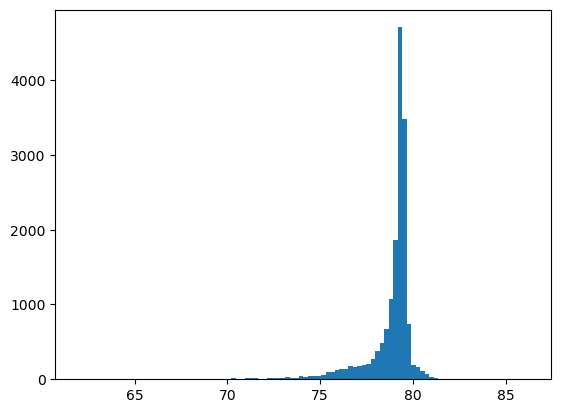

In [3]:
# Take the histogram of the image so we know how signal amplitudes are distribured
hist = pl.hist(image.flatten(),bins=100)

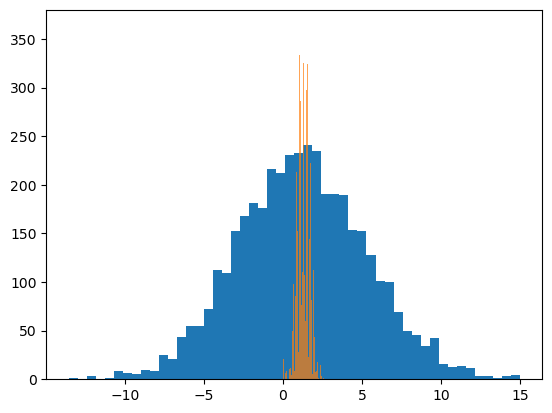

In [4]:
# Now, lets create some Gaussian noise in the signal
noise = np.random.normal(1.3,4,size=4096)
noise_histogram = pl.hist(noise,bins=50)
# And then we compare this noise with the signal
signal_histogram = pl.hist(signal,bins=50,alpha=0.7)

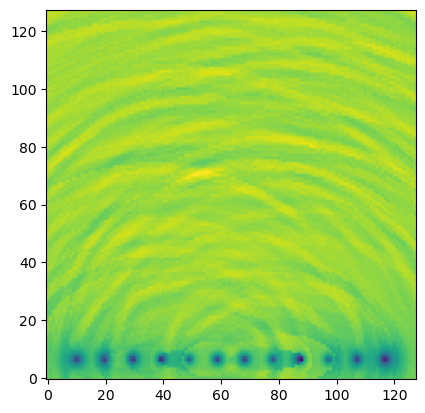

In [5]:
# We now add the noise to the signal
signal_plus_noise = signal+noise
noisy_image = signal_plus_noise.dot(G).reshape(128,128)
pl.imshow(noisy_image,origin='lower')

In [6]:
print(M.shape,G.shape)

(4096, 16384) (4096, 16384)


In [7]:
# struct.pack(">2d",M[1000][:2].flatten)

In [8]:
Mbin = M.tobytes()
Gbin = G.tobytes()

In [9]:
G.shape

(4096, 16384)

In [10]:
!ls

CMakeLists.txt           data                     semaphore.py
GT.mat                   data_txt                 setup.bash
Simulator                example.ipynb            setup.cmd
Simulator.cpp            getTracks.py             setup.py
Simulator.dSYM           helper_classes.py        simulateTracks.py
Simulator.m              import                   simulated_signal.mat
__init__.py              matlab_functions         simulator.py
__pycache__              params.json              venv
build                    posix_sem.py             windows-requirements.txt
convert_files.py         requirements.txt         windows_sem.py


In [11]:
from scipy.io import savemat

with open('sampling.bin','wb') as f:
    f.write(Mbin)
with open('sampling.mat', 'wb') as f:
    savemat(f,{'M':M})
with open('recovery.bin','wb') as f:
    f.write(Gbin)
with open('recovery.mat', 'wb') as f:
    savemat(f,{'G':G})

In [12]:
# reinport the matricies and check sizes
print(M.flatten().size, G.flatten().size)

a = np.fromfile('sampling.bin',dtype=np.float64)
b = np.fromfile('recovery.bin',dtype=np.float64)

print(a.size, b.size)

67108864 67108864
67108864 67108864


In [13]:
M[-1][-1]

0.5439701788127422

In [14]:
hex(5596)

'0x15dc'

In [15]:
M[0][1400]

0.0

In [16]:
print(M[1398][0], G[1398][0])

3.776754677295685 0.023895034566521645


In [17]:
import numpy as np
example_array = np.array([[.1, .2, .3], [-.4, -.5, -.6], [.7, .8, .9]])
examplebin = example_array.tobytes()
with open('import/example.bin','wb') as f:
    f.write(examplebin)